Data Preparation

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


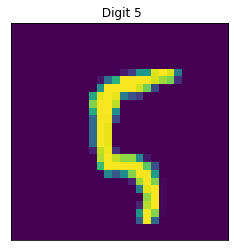

0 255


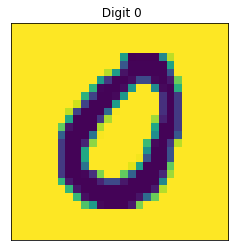

0.0 1.0
(28, 28, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

imgR,imgC=28, 28
numClasses=10
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()
(train_images_backup, train_labels_backup),(test_images_backup,test_labels_backup)=mnist.load_data()

print(train_images.shape)
print(test_images.shape)

#reshape matrices
train_images = train_images.reshape(train_images.shape[0],  imgR, imgC, 1)
test_images = test_images.reshape(test_images.shape[0], imgR, imgC, 1) 
input_shape = (imgR, imgC, 1) 

train_images[3000:]=255-train_images[3000:] 

plot_image(train_images,100,train_labels)
show_min_max(train_images,100)

#scale to floats from 0-1
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images/=255
test_images/=255

plot_image(train_images,4563,train_labels)
show_min_max(train_images,100)

#one-hot encoding to scramble image order 
train_labels = keras.utils.to_categorical(train_labels, numClasses) 
test_labels = keras.utils.to_categorical(test_labels, numClasses)

print(train_images[1232].shape)




In [ ]:

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

epochs=10 #initializes epoch number
model=Sequential() #creates model

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) #create initial convolutional layer
model.add(MaxPooling2D(pool_size=(2,2))) #prune to max node(s)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #creates another convolutional layer
model.add(Dropout(0.3)) #adds a dropout layer which drops random nodes to avoid overfitting
model.add(Flatten()) #adds a flattening layer to flatten the dropout layer
model.add(Dense(units=32,activation='relu')) #dense layer to connect nodes to the entire next layer
model.add(Dense(10, activation='softmax')) #again but with fewer nodes and a different activation

model.summary()

#RMSP=Root Mean Squared Propagation or decaying average
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

#training dataset, sends data in batches of 64, epochs, validation dataset, shuffle bool
model.fit(train_images, train_labels, batch_size=64, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True) 

#stores loss value and metric values in model test mode
scores=model.evaluate(test_images, test_labels, verbose=0) #verbose=print options
print('Test accuracy: ',scores[1])

model.save("mnistCNNmodel.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 32)                247840    
                                                      